In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "Arial"

In [ ]:
# load
datapath = '../../csv/tdcs-ptm_thresholds.csv'
data = pd.read_csv(datapath)

# wide to long and reorganize
data_long = pd.wide_to_long(df=data, stubnames=['threshold'], i=['sub', 'loc'], j='condition', sep='_', suffix=r'\w+')
data_long = data_long.reset_index()
data_long[['plevel', 'noise']] = data_long['condition'].str.split('_', expand=True)[[0, 1]].astype(int)
data_long['noise'] = data_long['noise'].replace({1: 0.005, 2: 0.01, 3: 0.0166, 4: 0.0276, 5: 0.0458, 6: 0.0761, 7: 0.1264, 8: 0.21})
data_long.drop(columns=['condition', 'Unnamed: 26', 'Unnamed: 27'], inplace=True)

In [3]:
# function
def predicted_contrast(parameters, Ne, d):
    r = parameters[0]
    beta = parameters[1]
    Na = parameters[2]
    Nm = parameters[3]
    Am = parameters[4]
    Af = parameters[5]
    Aa = parameters[6]

    x = 1 / (d ** 2) - (Am * Nm) ** 2
    if x < 0:
        x = 0.01

    log_pContrast = 1 / (2 * r) * np.log((1 + (Am * Nm) ** 2) * (Af * Ne) ** (2 * r) + (Aa * Na) ** 2) - \
                    1 / (2 * r) * np.log(x) - np.log(beta)

    return log_pContrast

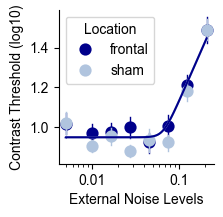

In [4]:
# Sham vs Frontal (plotting predictions from default model)

Ne = np.exp(np.linspace(np.log(0.005), np.log(0.21), 99))
Ne = np.insert(Ne, 0, 0)
d = np.array([1.089, 1.634])

paramsfit1 = np.array([4.26627072300002, 0.850321362349626, 1.10237800839730e-05, 0.611629112627199, 1, 1, 1])
paramsfit2 = np.array([4.26627072300002, 0.850321362349626, 1.10237800839730e-05, 0.611629112627199, 1, 1, 1])

ypredict11 = np.log10(np.exp(predicted_contrast(paramsfit1, Ne, d[0])) * 100) # CON 70
ypredict21 = np.log10(np.exp(predicted_contrast(paramsfit2, Ne, d[0])) * 100) # SCZ 70

# plot
f = plt.figure()
f.set_size_inches(2,2)
colors = ['darkblue', 'lightsteelblue']

doi = data_long[(data_long['plevel']==70) & (data_long['loc']!='parietal')]

sns.pointplot(data=doi, x='noise', y='threshold', hue='loc', errorbar=('ci', 68), linestyle='none', palette=colors, 
              native_scale=True, log_scale=(10, None), err_kws={'linewidth': 1})
plt.xlabel('External Noise Levels')
plt.ylabel('Contrast Threshold (log10)')
plt.xticks([0.01, 0.1], ['0.01', '0.1'])
plt.legend(title='Location')

Ne[0] = 0.005
plt.plot(Ne, ypredict11,  color=colors[1])  
plt.plot(Ne, ypredict21,  color=colors[0]) 

sns.despine()

plt.savefig('tdcs-ptm-fr.pdf', dpi=300, transparent=True, bbox_inches="tight")

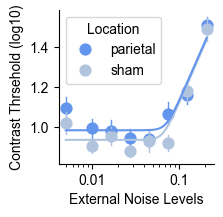

In [5]:
# Sham vs Parietal

Ne = np.exp(np.linspace(np.log(0.005), np.log(0.21), 99))
Ne = np.insert(Ne, 0, 0)
d = np.array([1.089, 1.634])

paramsfit1 = np.array([4.29368202472983, 0.869537794661703, 1.00830091773176e-05, 0.611615542434044, 1, 1, 1])
paramsfit2 = np.array([4.29368202472983, 0.869537794661703, 1.00830091773176e-05, 0.611615542434044, 1, 1.02539676355688, 1.61078105047278])

ypredict11 = np.log10(np.exp(predicted_contrast(paramsfit1, Ne, d[0])) * 100) # CON 70
ypredict21 = np.log10(np.exp(predicted_contrast(paramsfit2, Ne, d[0])) * 100) # SCZ 70

# plot
f = plt.figure()
f.set_size_inches(2, 2)
colors = ['cornflowerblue', 'lightsteelblue']

doi = data_long[(data_long['plevel']==70) & (data_long['loc']!='frontal')]

sns.pointplot(data=doi, x='noise', y='threshold', hue='loc', errorbar=('ci', 68), linestyle='none', palette=colors, 
              native_scale=True, log_scale=(10, None), err_kws={'linewidth': 1})
plt.xlabel('External Noise Levels')
plt.ylabel('Contrast Thrsehold (log10)')
plt.xticks([0.01, 0.1], ['0.01', '0.1'])
plt.legend(title='Location')

Ne[0] = 0.005
plt.plot(Ne, ypredict11,  color=colors[1])  
plt.plot(Ne, ypredict21,  color=colors[0]) 

sns.despine()

plt.savefig('tdcs-ptm-par.pdf', dpi=300, transparent=True, bbox_inches="tight")